In [5]:
!pip install stop-words

You should consider upgrading via the 'C:\Users\Ahmet\anaconda3\python.exe -m pip install --upgrade pip' command.


In [8]:
import pandas as pd
import numpy as np

#ploting packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

###### NLP packages
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from stop_words import get_stop_words
import re

#Wordcloud Modules
from wordcloud import WordCloud
from wordcloud import WordCloud,STOPWORDS

#Machine Learning Modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix 

In [9]:
df=pd.read_csv("spam.csv",encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
df.drop(["Unnamed: 2", "Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)
df.columns=["Class","Text"]
df["Label"]=df.Class.map({"ham":0,"spam":1})
df.head()

,Class,Text,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [11]:
ls #dosta içeriğini gosterir

 Volume in drive C has no label.
 Volume Serial Number is 5074-7CFC

 Directory of C:\Users\Ahmet\Desktop\AI W ZA\Lesson 7

05.07.2022  10:31    <DIR>          .
05.07.2022  10:31    <DIR>          ..
05.07.2022  06:21    <DIR>          .ipynb_checkpoints
05.07.2022  10:31             8.414 Spam Text Messages.ipynb
05.07.2022  06:20           503.663 spam.csv
               2 File(s)        512.077 bytes
               3 Dir(s)  111.700.484.096 bytes free


In [13]:
df.groupby('Class').describe(include='O')#o object olanları da al demek

Text                                                               
      count unique                                                top freq
Class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [19]:
df['text']=df['Text'].str.lower()

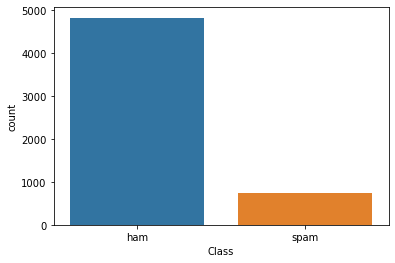

In [16]:
 sns.countplot(data=df,x='Class');

In [17]:
Ham_texts=df.query("Class=='ham'")['Text']
Spam_texts=df.query("Class=='spam'")['Text']

In [18]:
Ham_texts

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
6       Even my brother is not like to speak with me. ...
                              ...                        
5565                                         Huh y lei...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Text, Length: 4825, dtype: object

In [20]:
def words_cleaner(data):
    words=[re.sub('[^a-zA-Z]', '',i)for i in df['Text']]
    words=[i.lower() for j in data for i in j.split()]##spltimg all the sentences into words
    words=[i for i in words if not i in set(stopwords.words('english'))]## removing stopwords
    words=[i for i in words if len(i)>2 ]### removing words with less than two characters
    return words 
   

In [21]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor,max_words=100)
    wc.generate(''.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [35]:
ham_words=words_cleaner(Ham_texts)## cleaning using the function we created
ham_words_freq=nltk.FreqDist(ham_words)
ham_words_freq=pd.DataFrame(ham_words_freq.most_common(10),columns=['Top_Words','Frequency'])

In [36]:
ham_words_freq

,Top_Words,Frequency
0,i'm,369
1,get,293
2,&lt;#&gt;,276
3,got,227
4,like,221
5,call,215
6,come,215
7,know,208
8,good,187
9,i'll,167


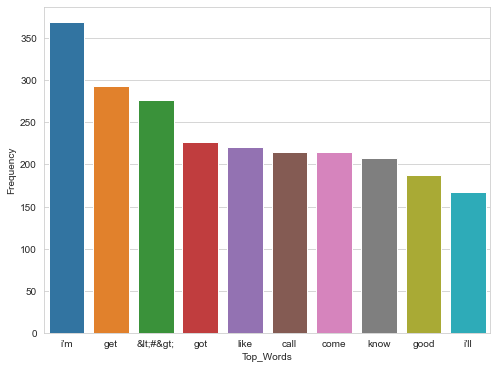

In [37]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
ax=sns.barplot(x='Top_Words',y='Frequency',data=ham_words_freq)

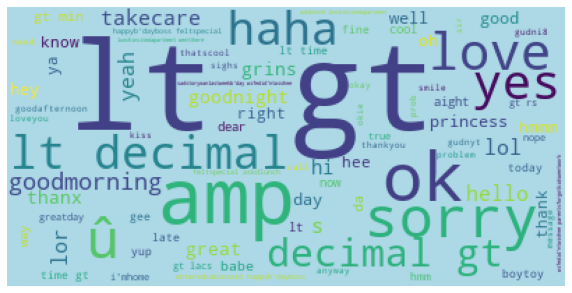

In [43]:
wc(ham_words,'lightblue')#wc word cloud

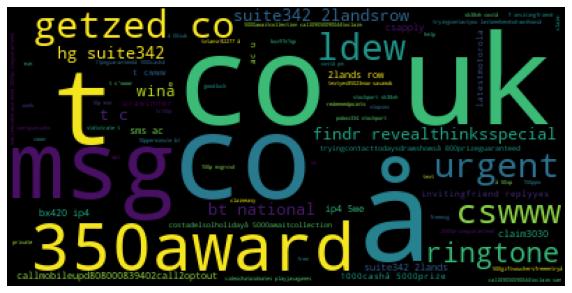

In [42]:
wc(words_cleaner(Spam_texts),'black')

In [54]:
cumle="Benim adım Ahmet"

In [55]:
cumle.split()

['Benim', 'adım', 'Ahmet']

In [44]:
def features_cleaner(data):
    clean_txt=[]
    for i in range(0,len(data)):
        text=re.sub('[^a-zA-Z]',' ',data[i])
        text=text.lower()
        text=text.split()
        ps=PorterStemmer()
        text=[ps.stem(j) for j in text if not j in set(stopwords.words('english'))]
        text=' '.join(text)
        clean_txt.append(text)
    return clean_txt


In [45]:
X=features_cleaner(df['Text'])
y=df['Label']

In [47]:
for i in range(0,3):
    print(df['Text'][i])
print('***********************   After Cleaning *********************')
for i in range(0,3):
    print(X[i])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
***********************   After Cleaning *********************
go jurong point crazi avail bugi n great world la e buffet cine got amor wat
ok lar joke wif u oni
free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli


In [48]:
cv=CountVectorizer() #dummy veeriable

X=cv.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=50)

In [49]:
pd.DataFrame(X_train)

,0
0,"(0, 830)\t1\n (0, 5727)\t1\n (0, 3538)\t1\..."
1,"(0, 322)\t1\n (0, 1540)\t1"
2,"(0, 2431)\t1\n (0, 1038)\t1\n (0, 635)\t1"
3,"(0, 1270)\t1\n (0, 4466)\t1\n (0, 972)\t1\..."
4,"(0, 2148)\t1\n (0, 5886)\t1\n (0, 5044)\t2..."
...,...
4174,"(0, 3928)\t1\n (0, 3399)\t1\n (0, 1129)\t1..."
4175,"(0, 3185)\t1\n (0, 5849)\t1\n (0, 3119)\t1..."
4176,"(0, 4268)\t1\n (0, 1892)\t1\n (0, 221)\t1"
4177,"(0, 3291)\t1\n (0, 4403)\t1\n (0, 312)\t1\..."


In [51]:
classifier=MultinomialNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [52]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[1178,   15],
       [  16,  184]], dtype=int64)

<AxesSubplot:>

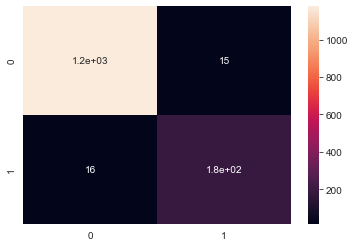

In [53]:
sns.heatmap(cf_matrix, annot=True)

In [56]:
accuracy_score(y_pred,y_test)

0.9777458722182341

In [57]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
d= DecisionTreeClassifier()

In [58]:
r.fit(X_train,y_train)
y_pred=r.predict(X_test)

In [59]:
r_matrix=confusion_matrix(y_test,y_pred)
r_matrix

array([[1191,    2],
       [  36,  164]], dtype=int64)

<AxesSubplot:>

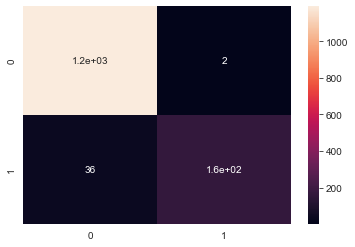

In [60]:
sns.heatmap(r_matrix, annot=True)

In [61]:
accuracy_score(y_pred,y_test)

0.9727207465900933

In [62]:
# Türklerin geliştirdiği geveze diye progeam sesi yazıya dönüştürüyor
#text to video diye bir program daha var

In [64]:
d.fit(X_train,y_train)
y_pred=r.predict(X_test)

In [65]:
d_matrix=confusion_matrix(y_test,y_pred)
d_matrix

array([[1191,    2],
       [  36,  164]], dtype=int64)

<AxesSubplot:>

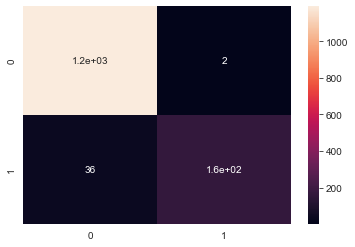

In [66]:
sns.heatmap(d_matrix, annot=True)

In [67]:
accuracy_score(y_pred,y_test)

0.9727207465900933

In [ ]:
#kursu bitirince sürekli proje yap
#kısm alanlarda profesyonellesmeye git